#  Hardware Validation 

Interactive notebook for running offline hardware validation tests.

**Test Categories:**
- : Internal Noise (Shorted Inputs)
- : External Noise (Floating Inputs)
- : Known Signal Injection (KSI) - CH2-CH8
- : Functional EEG Tests (Eyes Open/Closed/Blink)
- : Eyes Open vs Closed Montage Comparison

---
##  Setup & Configuration

Run this cell first to import the analysis package.

In [4]:
# ═══════════════════════════════════════════════════════════════════════════════
# IMPORTS
# ═══════════════════════════════════════════════════════════════════════════════
from pathlib import Path
import matplotlib.pyplot as plt

# Import the analysis package
from analysis.pipeline import run_pipeline
from analysis.decode_bin import parse_framestream_bin
from analysis.plots import (
    plot_eo_ec_montage, 
    plot_eo_ec_psd_comparison,
    plot_eo_ec_publication,           
    plot_eo_ec_publication_montage,   
    plot_eo_ec_publication_psd,       
    plot_eo_ec_publication_complete,  
)
from analysis.preprocess import FS_HZ

print("✓ Imports successful")
print(f"  Sampling rate: {FS_HZ} Hz")

✓ Imports successful
  Sampling rate: 16000 Hz


### 📁 Configure File Paths

Edit these paths to point to your .bin files.

In [5]:
# ═══════════════════════════════════════════════════════════════════════════════
# FILE PATHS - EDIT THESE
# ═══════════════════════════════════════════════════════════════════════════════

# Base directory for validation files
VALIDATION_BASE = Path(r"data/260130/validation")

# ─── NOISE TESTS ───────────────────────────────────────────────────────────────
BIN_INTERNAL_NOISE = VALIDATION_BASE / "260130_140604_FW2_R2_INT_1600_16k.bin"
BIN_EXTERNAL_NOISE = VALIDATION_BASE / "260130_140952_FW2_R2_EXT_1600_16k.bin"

# ─── KNOWN SIGNAL INJECTION (KSI) ──────────────────────────────────────────────
BIN_KSI_CH2 = VALIDATION_BASE / "260130_142125_FW2_R2_KSI_CH2_40HZ_1600_16k.bin"
BIN_KSI_CH3 = VALIDATION_BASE / "260130_142322_FW2_R2_KSI_CH3_40HZ_1600_16k.bin"
BIN_KSI_CH4 = VALIDATION_BASE / "260130_142403_FW2_R2_KSI_CH4_40HZ_1600_16k.bin"
BIN_KSI_CH5 = VALIDATION_BASE / "260130_142502_FW2_R2_KSI_CH5_40HZ_1600_16k.bin"
BIN_KSI_CH6 = VALIDATION_BASE / "260130_142541_FW2_R2_KSI_CH6_40HZ_1600_16k.bin"
BIN_KSI_CH7 = VALIDATION_BASE / "260130_142622_FW2_R2_KSI_CH7_40HZ_1600_16k.bin"
BIN_KSI_CH8 = VALIDATION_BASE / "260130_142722_FW2_R2_KSI_CH8_40HZ_1600_16k.bin"

# ─── FUNCTIONAL TESTS ──────────────────────────────────────────────────────────
BIN_EYES_OPEN = VALIDATION_BASE / "260130_153012_FW2_R2_FUNEO_1600_16k.bin"
BIN_EYES_CLOSED = VALIDATION_BASE / "260130_153215_FW2_R2_FUNEC_1600_16k.bin"
BIN_EYES_BLINK = VALIDATION_BASE / "260130_174236_FW2_R2_FUNEB_200_1k.bin"

print("✓ File paths configured")
print(f"  Base: {VALIDATION_BASE}")

✓ File paths configured
  Base: online\data\260130\validation


---
## Internal Noise (Shorted Inputs)

Measures the intrinsic noise floor of the ADS1299 ADC with all inputs shorted.

**Expected:** Very low noise, flat spectrum

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════════
# A1: INTERNAL NOISE ANALYSIS
# ═══════════════════════════════════════════════════════════════════════════════

results_internal = run_pipeline(
    BIN_INTERNAL_NOISE,
    display_plots=True,
    export_pdf_report=True,
)

print("\n✓ A1 Internal noise analysis complete.")

---
##   External Noise (Floating Inputs)

Measures environmental noise pickup with floating (unconnected) inputs.

**Expected:** 50Hz mains pickup, higher noise than internal

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════════
# A2: EXTERNAL NOISE ANALYSIS
# ═══════════════════════════════════════════════════════════════════════════════

results_external = run_pipeline(
    BIN_EXTERNAL_NOISE,
    display_plots=True,
    export_pdf_report=True,
)

print("\n✓ A2 External noise analysis complete.")

---
##  Known Signal Injection (KSI)

Verifies channel integrity by injecting a known 40Hz signal into each channel.

**Expected:** Clear 40Hz peak on the injected channel

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════════
# B1: KSI CHANNEL 2
# ═══════════════════════════════════════════════════════════════════════════════

results_ksi_ch2 = run_pipeline(
    BIN_KSI_CH2,
    display_plots=True,
    export_pdf_report=True,
)

print("\n✓ B1 KSI CH2 analysis complete.")

In [ ]:
# B2: KSI CHANNEL 3
results_ksi_ch3 = run_pipeline(BIN_KSI_CH3, display_plots=True, export_pdf_report=True)
print("\n✓ B2 KSI CH3 complete.")

In [ ]:
# B3: KSI CHANNEL 4
results_ksi_ch4 = run_pipeline(BIN_KSI_CH4, display_plots=True, export_pdf_report=True)
print("\n✓ B3 KSI CH4 complete.")

In [ ]:
# B4: KSI CHANNEL 5
results_ksi_ch5 = run_pipeline(BIN_KSI_CH5, display_plots=True, export_pdf_report=True)
print("\n✓ B4 KSI CH5 complete.")

In [ ]:
# B5: KSI CHANNEL 6
results_ksi_ch6 = run_pipeline(BIN_KSI_CH6, display_plots=True, export_pdf_report=True)
print("\n✓ B5 KSI CH6 complete.")

In [ ]:
# B6: KSI CHANNEL 7
results_ksi_ch7 = run_pipeline(BIN_KSI_CH7, display_plots=True, export_pdf_report=True)
print("\n✓ B6 KSI CH7 complete.")

In [ ]:
# B7: KSI CHANNEL 8
results_ksi_ch8 = run_pipeline(BIN_KSI_CH8, display_plots=True, export_pdf_report=True)
print("\n✓ B7 KSI CH8 complete.")

---
##  Functional EEG Tests

Real EEG recordings from a human subject.

- **Eyes Open**: Baseline brain activity
- **Eyes Closed**: Should show enhanced alpha (7-13 Hz)
- **Eye Blinks**: Artifact detection

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════════
# C1: EYES OPEN
# ═══════════════════════════════════════════════════════════════════════════════

results_eo = run_pipeline(
    BIN_EYES_OPEN,
    display_plots=True,
    export_pdf_report=True,
)

print("\n✓ C1 Eyes Open analysis complete.")

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════════
# C2: EYES CLOSED
# ═══════════════════════════════════════════════════════════════════════════════

results_ec = run_pipeline(
    BIN_EYES_CLOSED,
    display_plots=True,
    export_pdf_report=True,
)

print("\n✓ C2 Eyes Closed analysis complete.")

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════════
# C3: EYE BLINKS
# ═══════════════════════════════════════════════════════════════════════════════

results_blink = run_pipeline(
    BIN_EYES_BLINK,
    display_plots=True,
    export_pdf_report=True,
)

print("\n✓ C3 Eye Blinks analysis complete.")

---
##  Eyes Open vs Closed Montage Comparison

Side-by-side comparison showing alpha modulation.

**Expected:** Stronger alpha oscillations in Eyes Closed, especially in O1/O2

================ EYES OPEN vs EYES CLOSED — PUBLICATION FIGURE =================

[1/3] Parsing Eyes Open...
      1600 frames
[2/3] Parsing Eyes Closed...
      1600 frames
[3/3] Generating complete publication figure...
      (a) Electrode montage
      (b) PSD comparison (linear axes)
      (c) EEG time series (EO|EC)


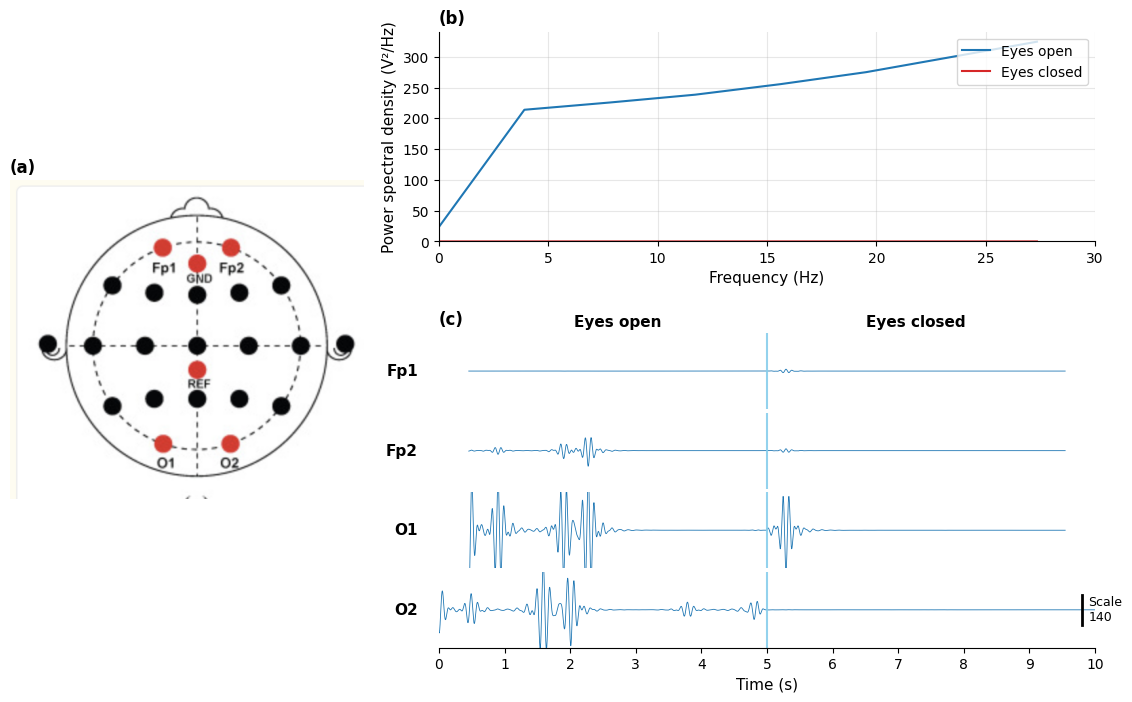

In [7]:
# ═══════════════════════════════════════════════════════════════════════════════
# D: EO vs EC - COMPLETE PUBLICATION FIGURE (3 panels)
# ═══════════════════════════════════════════════════════════════════════════════

print("="*80)
print(" EYES OPEN vs EYES CLOSED — PUBLICATION FIGURE ".center(80, "="))
print("="*80)

# Parse both files
print("\n[1/3] Parsing Eyes Open...")
bin_bytes_eo = BIN_EYES_OPEN.read_bytes()
counts_eo, meta_eo = parse_framestream_bin(bin_bytes_eo)
print(f"      {meta_eo['n_frames']} frames")

print("[2/3] Parsing Eyes Closed...")
bin_bytes_ec = BIN_EYES_CLOSED.read_bytes()
counts_ec, meta_ec = parse_framestream_bin(bin_bytes_ec)
print(f"      {meta_ec['n_frames']} frames")

# ─── COMPLETE 3-PANEL FIGURE ──────────────────────────────────────────────────
print("[3/3] Generating complete publication figure...")
print("      (a) Electrode montage")
print("      (b) PSD comparison (linear axes)")
print("      (c) EEG time series (EO|EC)")

fig = plot_eo_ec_publication_complete(
    counts_eo, counts_ec,
    fs_hz=FS_HZ,
    duration_s=5.0,
    psd_channel=5,  # O2 - best for alpha
    montage_image_path="analysis/assets/montage_head.png",
)
plt.show()



---
##  Custom Analysis

Analyze any .bin file by specifying the path below.

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════════
# CUSTOM ANALYSIS - Edit path and run
# ═══════════════════════════════════════════════════════════════════════════════

CUSTOM_BIN = Path(r"path/to/your/file.bin")  # ← EDIT THIS

if CUSTOM_BIN.exists():
    results_custom = run_pipeline(
        CUSTOM_BIN,
        display_plots=True,
        export_pdf_report=True,
    )
    print("\n✓ Custom analysis complete.")
else:
    print(f"File not found: {CUSTOM_BIN}")
    print("Edit CUSTOM_BIN path above and re-run this cell.")